
A. Face Detection Workflow:
1. Load Image
2. Load Haar Cascade Classsifier
3. Face Detect with rectangle

In [1]:
#Library
import cv2 as cv
import matplotlib.pyplot as plt

#Read Image From local System
original_image = cv.imread('./Train/Non Mask/0.jpg')


In [2]:
#Shape and array image
original_image.shape
#original_image[0]

(270, 180, 3)

In [3]:
original_image[0]

array([[18,  3,  7],
       [18,  3,  7],
       [18,  3,  7],
       [19,  4,  8],
       [19,  4,  8],
       [19,  4,  8],
       [19,  4,  8],
       [19,  4,  8],
       [17,  2,  6],
       [18,  3,  7],
       [20,  5,  9],
       [20,  5,  9],
       [19,  4,  8],
       [19,  4,  8],
       [21,  6, 10],
       [23,  8, 12],
       [19,  5, 11],
       [20,  6, 12],
       [20,  6, 12],
       [19,  5, 11],
       [18,  4, 10],
       [18,  4, 10],
       [20,  6, 12],
       [23,  9, 15],
       [18,  4, 10],
       [17,  3,  9],
       [16,  2,  8],
       [16,  2,  8],
       [16,  2,  8],
       [16,  2,  8],
       [17,  3,  9],
       [17,  3,  9],
       [21,  5, 16],
       [21,  5, 16],
       [22,  6, 17],
       [23,  7, 18],
       [26, 10, 21],
       [28, 12, 23],
       [30, 13, 26],
       [31, 14, 27],
       [29, 12, 25],
       [27, 10, 23],
       [25,  8, 21],
       [26,  9, 22],
       [29, 12, 25],
       [33, 16, 29],
       [35, 18, 31],
       [35, 1

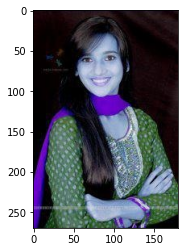

In [6]:
#See Image use matplotlib
plt.imshow(original_image)

In [7]:
"""
load  Viola Jones Algorithm the classifier and create a cascade obejct for face detection
with xml file on open cv
"""
face = cv.data.haarcascades+"haarcascade_frontalface_alt.xml"
face_cascade = cv.CascadeClassifier(face)
detected_faces = face_cascade.detectMultiScale(original_image)
#load Array
face_cascade.detectMultiScale(original_image)

array([[47, 35, 70, 70]])

In [8]:
# Open Rectangle for face detection
for (column,row,width,height) in detected_faces:
    cv.rectangle(
        original_image,
        (column,row),
        (column + width,row+height),
        (0,255,0),
        2
    )

In [9]:
#load image in new window
cv.imshow('Image', original_image)
cv.waitKey(0)
cv.destroyAllWindows()

B. Mask Detection
Workflow :
1. Colect Face data with or without mask
2. Training use macine learning
3. Do Prediction with list of image

In [10]:
#library for collect data
import cv2 as cv
import numpy as np
import glob
import os


In [11]:
#collect data from image with mask
"""
load  Viola Jones Algorithm the classifier and create a cascade obejct for face detection
with xml file on open cv
"""
face = cv.data.haarcascades+"haarcascade_frontalface_alt.xml"
face_cascade = cv.CascadeClassifier(face)

#list data_image to store face data
image_dir ="./Train/Mask/"
data_path = os.path.join(image_dir,'*.*g')
image_files = glob.glob(data_path)
data_image=[]

for file in image_files:

    original_image=cv.imread(file)
    detected_faces = face_cascade.detectMultiScale(original_image)
    for x,y,w,h in detected_faces:
        cv.rectangle(original_image,(x,y),(x+w,y+h),(255,0,255),4)
        detected_face = original_image[y:y+h,x:x+w,:]
        detected_face = cv.resize(detected_face,(50,50))
    
        data_image.append(detected_face)
print(data_image)
#save data in numpy file
np.save('with_mask.npy',data_image)

[array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [103,  12, 107],
        ...,
        [ 92,  67, 101],
        [177,  32, 181],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [ 63,  14,  68],
        ...,
        [ 26,  27,  28],
        [145,  13, 145],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [162,   6, 165],
        ...,
        [146,  14, 146],
        [203,   6, 203],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]

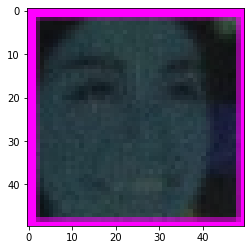

In [12]:
plt.imshow(data_image[0])

In [13]:
#collect data from image non mask
"""
load  Viola Jones Algorithm the classifier and create a cascade obejct for face detection
with xml file on open cv
"""
face = cv.data.haarcascades+"haarcascade_frontalface_alt.xml"
face_cascade = cv.CascadeClassifier(face)

#list data_image to store face data
image_dir ="./Train/Non Mask/"
data_path = os.path.join(image_dir,'*.jpg')
image_files = glob.glob(data_path)
data_image=[]

for file in image_files:

    original_image=cv.imread(file)
    detected_faces = face_cascade.detectMultiScale(original_image)

    for x,y,w,h in detected_faces:
        cv.rectangle(original_image,(x,y),(x+w,y+h),(255,0,255),4)
        detected_face = original_image[y:y+h,x:x+w,:]
        detected_face = cv.resize(detected_face,(50,50))
    
        data_image.append(detected_face)
    
print(data_image)
#save data in numpy file
np.save('without_mask.npy',data_image)

[array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [  4,   0,   3],
        ...,
        [  9,   7,   7],
        [122,  19, 121],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [  0,   0,   0],
        ...,
        [  3,   2,   4],
        [102,   1, 104],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [102,   0, 102],
        ...,
        [103,   1, 103],
        [163,   0, 164],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]

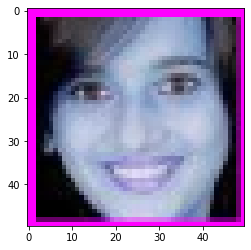

In [14]:
plt.imshow(data_image[0])

In [15]:
#load File Numpy
with_mask = np.load('with_mask.npy',allow_pickle=True)
without_mask = np.load('without_mask.npy',allow_pickle=True)
#load shape Array
with_mask.shape

(103, 50, 50, 3)

In [16]:
#load shape Array
without_mask.shape 

(287, 50, 50, 3)

In [17]:
#Change Array from 3D to 2D
with_mask = with_mask.reshape(103,50*50*3)
without_mask = without_mask.reshape(287,50*50*3)

In [18]:
with_mask.shape

(103, 7500)

In [19]:
without_mask.shape 

(287, 7500)

In [20]:
#Conconate Data Array with_mask and without_mask
X=np.r_[with_mask,without_mask]
X.shape 

(390, 7500)

In [21]:
#Data with_mask = 103 and without_mask = 287
labels = np.zeros(X.shape[0])
labels[103:] = 1.0
names = {0 : 'Mask', 1: 'No Mask'}

In [22]:
""" 
Apply Machine Learning
a. Import Package for Machine Learning
b. svm - Support Vector Machine
c. SVC - Support Vector Classification
"""

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,labels, test_size = 0.25)
X_train.shape 

(292, 7500)

In [23]:
# Algorithm use SVM with Kernel = 'polynomial' for image processing
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9285714285714286

C. Test with image from webcam

In [24]:
"""
load  Viola Jones Algorithm the classifier and create a cascade obejct for face detection
with xml file on open cv
"""

import cv2 as cv

face = cv.data.haarcascades+"haarcascade_frontalface_alt.xml"
face_cascade = cv.CascadeClassifier(face)

capture = cv.VideoCapture(0)
font = cv.FONT_HERSHEY_COMPLEX

while True:
    flag,img = capture.read()
    if flag:
        detected_faces = face_cascade.detectMultiScale(img)
        for x,y,w,h in detected_faces:
            cv.rectangle(img,(x,y),(x+w, y+h),(255,0,255),4)
            detected_face = img[y:y+h,x:x+w,:]
            detected_face = cv.resize(detected_face,(50,50))
            detected_face = detected_face.reshape(1,-1)
            pred = clf.predict(detected_face)[0]
            n = names[int(pred)]
            cv.putText(img,n,(x,y),font,1,(244,250,250),2)
            print(n)
        cv.imshow('result',img)
        #27 - ASCII of Escape
        if cv.waitKey(2) == 27:
            break
capture.release()
cv.destroyAllWindows()

No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
Mask